# Project II: Business Statistics: Axis Insurance

Context - Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.
Data Dictionary –

1.	Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2.	Sex - This is the policy holder's gender, either male or female.
3.	BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4.	Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5.	Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6.	Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7.	Charges - Individual medical costs billed by health insurance

Data Dictionary –
1.	Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2.	Sex - This is the policy holder's gender, either male or female.
3.	BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4.	Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5.	Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6.	Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7.	Charges - Individual medical costs billed by health insurance


# A - Loading Necessary Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats
from bioinfokit.analys import stat
from scipy.stats import chi2_contingency 
import scipy.stats as stats

# get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter("ignore")
#!pip install bioinfokit

In [41]:
data = pd.read_csv ('AxisInsurance.csv') # Importing data
df=data.copy()                           # Making a copy of data to avoid unwanted changes to original data

In [42]:
df.head(10)                              # Viewing first 10 Information contained in data set

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [43]:
df.describe()                           # Checking Statistical Summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observation**

1. The Average Bmi is about 30.66
2. The Min charge is about 1121.87 and the Max is 63770.43
3. The average age in the data set is 39 years.
4. The min number of children is 0 and the max is 5

# B - Data Shape

In [44]:
df.shape

(1338, 7)

**Observation**

* There are 1338 rows and 7 column in the data set

# C - Checking for Data types

In [45]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Observation**

1. Age, Number of children (children) are of type int 
2. Sex, Smoker, Charges are of type object (string)
3. Bmi, charges are of type float

# D - Checking for missing Data

In [46]:
pd.DataFrame( df.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

,Total Missing Values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Observation**

* There are no missing data in this data set.

# 1 - Exploratory Data Analysis

male      676
female    662
Name: sex, dtype: int64

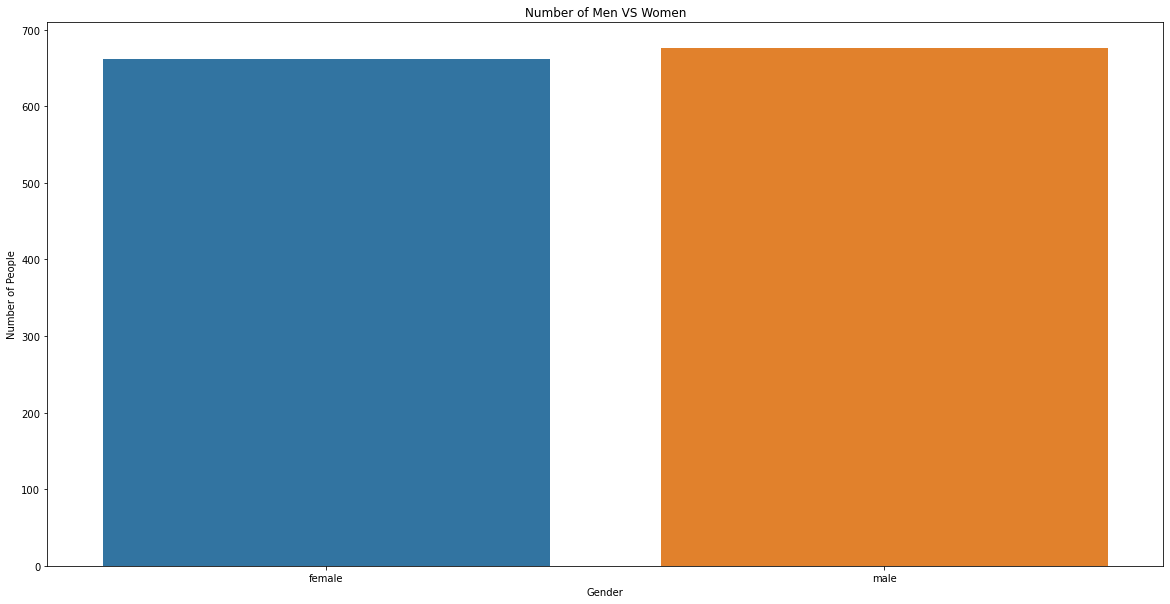

In [47]:
plt.figure(figsize=(20,10))                     #Adjusting plot width to 20 and height to 10
sns.countplot(x='sex', data=df)                 #Ploting graph to see most number of men vs women
plt.title('Number of Men VS Women')             #Name that will be assigned to plot
plt.ylabel('Number of People')                  #Label (name) for Y axis
plt.xlabel('Gender')                            #Label (name) for X axis

df['sex'].value_counts(ascending=False)         #Counting number for of Male and Female

**Observation**

* This data set contains 676 Male and 662 Female

no     1064
yes     274
Name: smoker, dtype: int64

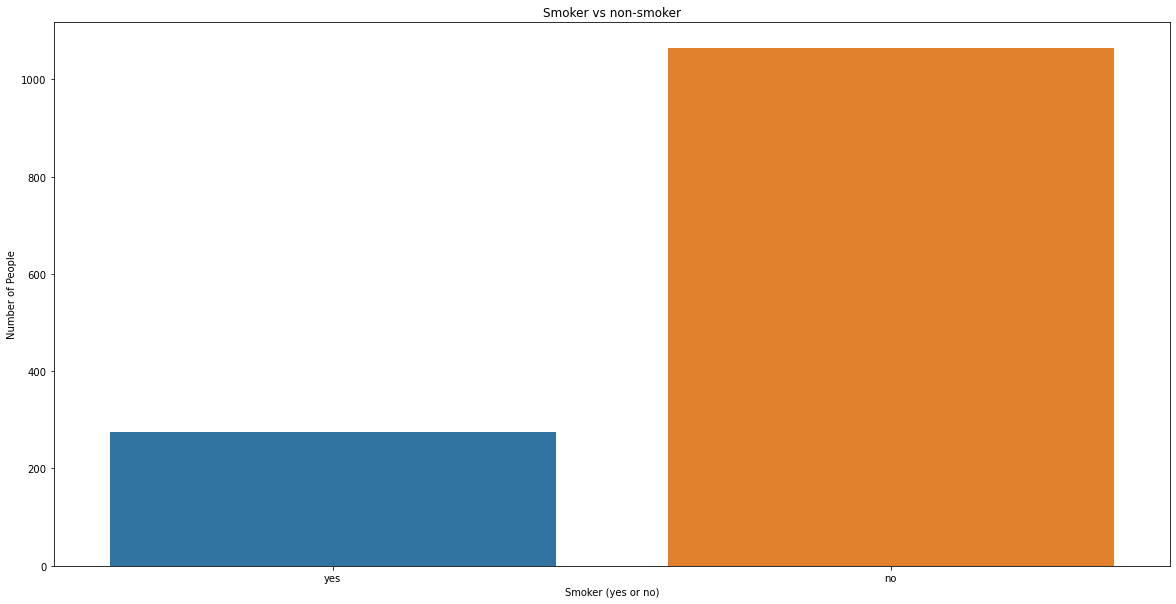

In [48]:
plt.figure(figsize=(20,10))                #Adjusting plot width to 20 and height to 10
sns.countplot(x='smoker', data=df)         #Ploting graph to see number of Smoker vs Non-smoker
plt.title('Smoker vs non-smoker')          #Name that will be assigned to plot
plt.ylabel('Number of People')             #Label (name) for Y axis
plt.xlabel('Smoker (yes or no)')           #Label (name) for X axis

df['smoker'].value_counts(ascending=False) #Counting number of Smoker (yes) vs Non-Smoker (no)

**Observation**
* This data set contains 1064 non smoker and 274 smokers

Text(0, 0.5, 'Number of People')

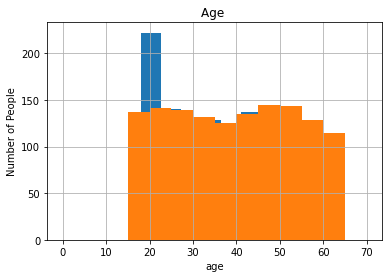

In [49]:
df.hist('age')                                 #Ploting graph to show Age brackets
plt.hist(df['age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]) #Making age brackets more visible
plt.title('Age ')                              #Name that will be assigned to Plot
plt.xlabel('age')                              #Label (name) for X coordinates
plt.ylabel ('Number of People')                #Label (name) for Y coordinates

**Observation**
1.  As expected we see that the data contains data on people between the age of 15 to 64
2.  We also see that there is a higher number of people between the age of 18 to 22

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

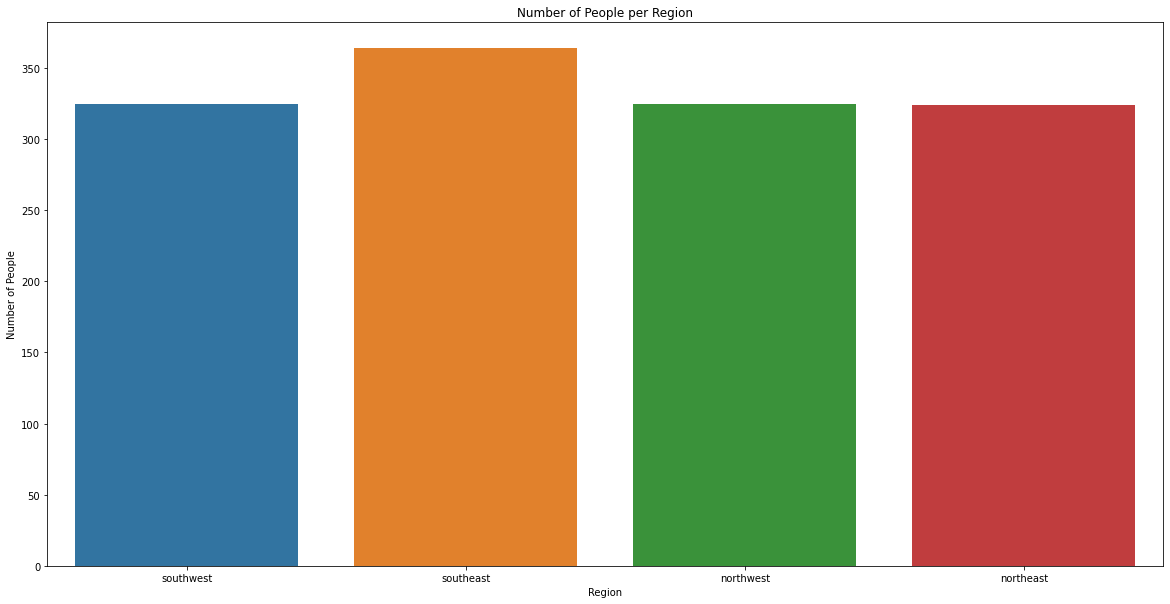

In [50]:
plt.figure(figsize=(20,10))                  #Adjusting plot width to 20 and height to 10
sns.countplot(x='region', data=df)           #Ploting graph to see most Popular Region
plt.title('Number of People per Region')     #Name that will be assigned to plot
plt.ylabel('Number of People')               #Label (name) for Y axis
plt.xlabel('Region')                         #Label (name) for X axis

df['region'].value_counts(ascending=False)  #Counting number of people for each Region

**Observation**
* We can see that the Southeast is the most popular region, followed by the Northeast, followed by the Southwest and Northeast

Text(0.5, 1.0, 'Sex vs Bmi')

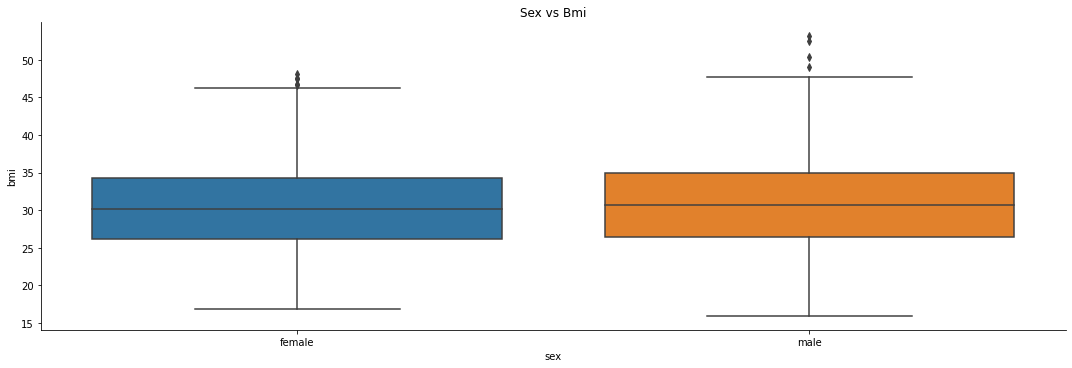

In [51]:
#Plotting Box Plot to show Sex vs Bmi
sns.catplot(x="sex", y="bmi", kind = "box", data=df, height=5, aspect=3)
plt.title('Sex vs Bmi')#Plot title
#The graph below is an example of Multivariate Analysis

**Observation**
* We see that the bmi for male is sligther higher for female


Text(0.5, 1.0, 'Sex vs Charges')

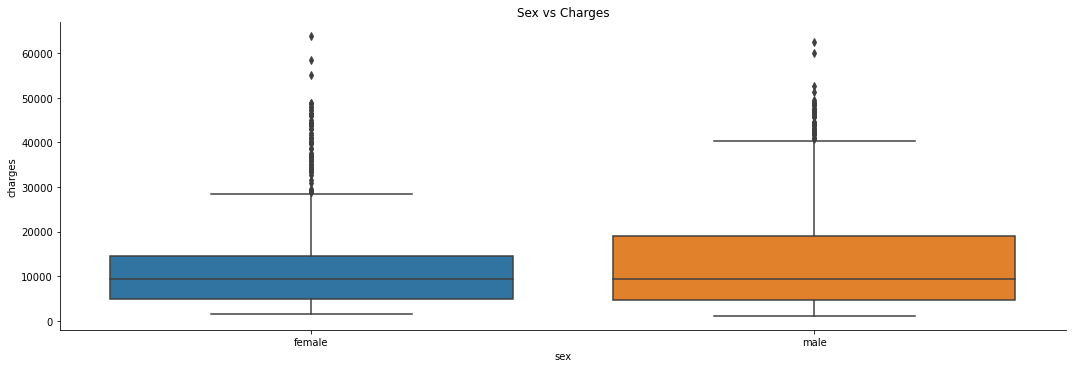

In [52]:
#Plotting Box Plot to show Product vs Income
sns.catplot(x="sex", y="charges", kind = "box", data=df, height=5, aspect=3)
plt.title('Sex vs Charges')#Plot title
#The graph below is an example of Multivariate Analysis

**Observations**

* We that charges for males are slightly higher

Text(0.5, 1.0, 'Charges vs Sex')

<Figure size 1440x720 with 0 Axes>

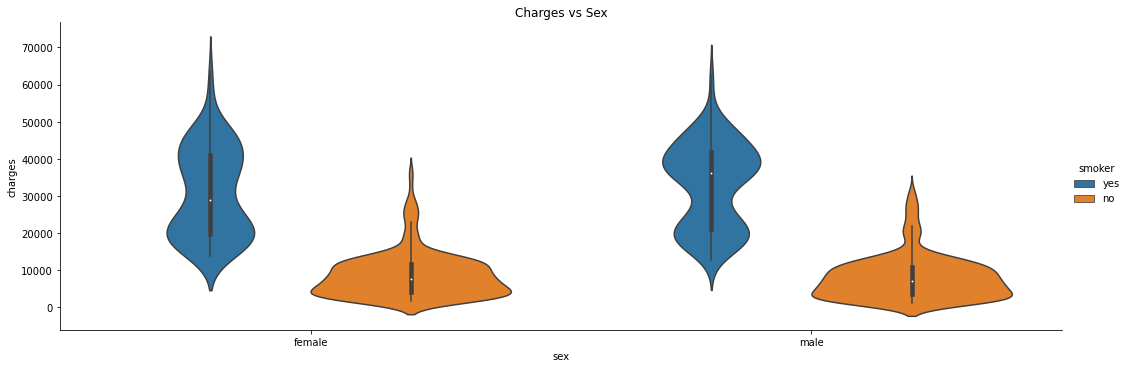

In [53]:
plt.figure(figsize=(20,10))         #Adjusting plot width to 20 and height to 10

#Plotting Violion Plot to show Product vs Usage sorted by Years of Fitness level
sns.catplot(x="sex", y="charges", hue="smoker",kind="violin", data=df, height=5,  aspect=3)
plt.title("Charges vs Sex")

**Observation**

* We see charges are higher for smoker regardless of sex


# 2.	Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

# Step 1: Define null and alternative hypotheses

* $H_0$ : "charges" for medical claims for non-smokers is equal to "charges" of smokers
* $H_A$ : "charges" for medical claims for smokers is higher than "charges" of non-smokers

# Step 2: Decide the significance level

α= 0.05  (This was provided in exercice)

# Step 3: Identify the test

This is a two-sample, paired, t - test

# Step 4: Calculate the test-statistics and p-value

In [54]:
#Assigning value stat() to res to be used to call stat() method
res = stat()

#Using .ttest to calculate the T-test for the means of two samples (smoker and charges)
res.ttest(df, xfac="smoker", res="charges", test_type=2) 

#Printing statistical summary
print(res.summary)




Two sample t-test with equal variance

------------------  -----------------
Mean diff           -23616
t                      -46.6649
Std Error              506.075
df                    1336
P-value (one-tail)       4.13572e-283
P-value (two-tail)       8.27144e-283
Lower 95.0%         -24608.8
Upper 95.0%         -22623.2
------------------  -----------------

Parameter estimates

Level      Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
no           1064   8434.27    5993.78      183.751        8073.71        8794.82
yes           274  32050.2    11541.5       697.25        30677.6        33422.9



# Step 5: Decide to reject or accept null hypothesis

Medical claims made by Smokers (Mean= 32.50.2, Standard Deviation=11541.5) is greater than those of non smokers (Mean =8434.27, Standard Deviation =5993.78) ; t(1336)= -46.66, p < .001. **We reject the Null Hypothesis**

# 3.	Prove (or disprove) with statistical evidence that the BMI of females is different from that of males. 


# Step 1: Define null and alternative hypotheses


* $H_0$ : BMI of females is equal to BMI of Males
* $H_A$ : BMI of females is greater than BMI of Males

# Step 2: Decide the significance level

α= 0.05  (This was provided in exercice)

# Step 3: Identify the test


Two sample t-test with equal variance

# Step 4: Calculate the test-statistics and p-value¶

In [55]:
#Assigning value stat() to res to be used to call stat() method
res = stat()

#Using .ttest to calculate the T-test for the means of two samples (Sex and BMI)
res.ttest(df, xfac="sex", res="bmi", test_type=2)

#Printing statistical summary
print(res.summary)


Two sample t-test with equal variance

------------------  ------------
Mean diff             -0.565379
t                     -1.69675
Std Error              0.333213
df                  1336
P-value (one-tail)     0.0449882
P-value (two-tail)     0.0899764
Lower 95.0%           -1.21906
Upper 95.0%            0.0882975
------------------  ------------

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
female        662  30.3777    6.04602     0.234985        29.9163        30.8392
male          676  30.9431    6.14043     0.236171        30.4794        31.4068



# Step 5: Decide to reject or accept null hypothesis

We conclude that there is not much difference between BMI for male (M= 30.94, SD=6.14) and female (M=30.37, SD=6.04) ; t(1336)=-1.6, p = .08. **We accept the null hypotesis.**

# 4.	Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

The proportion of smokers in southeast region is higher than others.
Chi-sq test to check if smoking habits are different for different regions
Null Hypothesis = Ho = "Region has no effect on smoking habits"

Alternate Hypothesis = Ha = "Region has an effect on smoking habits"

Significance Level = 0.05

In [56]:
# Chi_square test to check if smoking habits are different across different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

In [57]:
crosstab = pd.crosstab(df['region'],df['smoker'])  # Contingency table of region and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)



In [58]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Region has no effect on smoking habits as the p_value (0.062) > 0.05


__Observation:__
* Region has no effect on smoking habits as the p_value (0.062) > 0.05
* Proportion of smokers across different regions is same.

In [59]:
# Checking the distribution of smokers across different regions
pd.crosstab(df['smoker'],df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


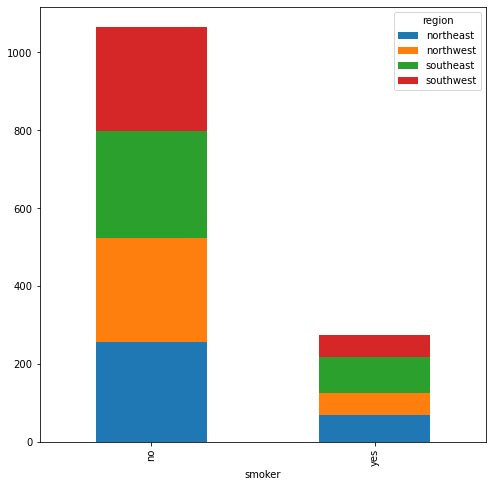

In [60]:
pd.crosstab(df['smoker'],df['region']).plot(kind="bar", figsize=(8,8),
                 stacked=True)

# 5.	Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

In [63]:
# selecting data where sex = female
dm = data[data["sex"]=="female"]

# selecting data where number of children are 0, 1 and 2 only
dm = dm.loc[dm["children"].isin([0, 1, 2])]

dm.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


# Step 1: Define null and alternative hypotheses

* $H_0$ : There is no significant difference in the BMI of women with no children, one child, and two children.
* $H_A$ : There is significant difference in the BMI of women with no children, one child, and two children.

# Step 2: Decide the significance level

α= 0.05  (This was provided in exercice)

# Step 3: Identify the test



One-Way ANOVA 

# Step 4: Calculate the test-statistics and p-value¶


In [64]:
d_melt = dm[["bmi", "children"]]
# Ordinary Least Squares (OLS) model
model = ols('bmi ~ C(children)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(children),24.590123,2.0,0.334472,0.715858
Residual,20695.661583,563.0,NaN,NaN


One-Way ANOVA was conducted to check whether there was difference in BMI of women with no children, one child, and two children. The P-value (0.7) obtained from ANOVA analysis was not significant (P>0.05), and therefore, we conclude that there were no significant differences in BMI of women with no children, one child, and two children. **We accept the Null**.